# Tugas Pagerank

1.   Buat graph berarah dengan NetworkX (minimal 9 node )
  *   Hitung manual pagerank dari graph yang anda buat
  *   Hitung pagerank menggunakan NetworkX
2.   Implementasikan ulang  https://github.com/Shakunni/Extractive-Text-Summarization/blob/master/extractive_summarizer.ipynb
  *   Jelaskan prosesnya
  *   Upload di github repository webstatis masing masing 

## Menentukan graph dan plot

In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()
G.add_edges_from([(0,2),(0,4),(0,5),(1,7),(2,0),(2,4),(2,5),(3,7),(4,8),(5,1),(5,8),(6,3),(6,8),(7,0),(8,0),(8,1),(8,6)])

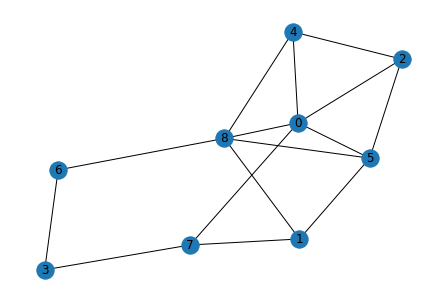

In [ ]:
# draw the graph
nx.draw(G, with_labels=True)

## Hitung Pagerank dengan NetworkX

In [ ]:
page_rank = nx.pagerank(G, alpha=0.85)
print('NetwrokX PageRank :',page_rank)


NetwrokX PageRank : {0: 0.1558998220673495, 2: 0.09777559041925096, 4: 0.09793266220277633, 5: 0.12639349288132878, 1: 0.10044924344376191, 7: 0.10540541897118083, 3: 0.07946863845888402, 8: 0.15917393983368838, 6: 0.07750119172177906}


## Hitung Pagerank Manual dengan Code Python

In [ ]:
import numpy as np


def pagerank(M, alpha=0.85, max_iter=100, tol=1e-6):
    """
    Fungsi untuk menghitung PageRank menggunakan metode iteratif dengan algoritma Power Method.
    
    Parameter:
    M (np.array): Matriks adjacency dari graf yang akan dihitung PageRank-nya.
    alpha (float): Damping factor, default 0.85.
    max_iter (int): Jumlah iterasi maksimum, default 100.
    tol (float): Toleransi kesalahan, default 1e-6.
    
    Return:
    v (np.array): Vektor PageRank.
    """
    n = M.shape[0]
    v = np.ones(n) / n
    M_hat = (alpha * M + (1 - alpha) / n)
    for _ in range(max_iter):
        v_last = v
        v = M_hat @ v
        if np.linalg.norm(v - v_last, 1) < tol:
            break
    return v

In [ ]:
# inisialisasi matriks
n = G.number_of_nodes()
M = np.array(nx.adjacency_matrix(G).todense())
M = M / M.sum(axis=0)


# hitung pagerank
v = pagerank(M)
print('Manual PageRank :',v)

Manual PageRank : [0.15590023 0.09777579 0.09793244 0.12639312 0.10044956 0.10540472
 0.07946921 0.1591743  0.07750063]


## Implementasi Text Summarization in Python

In [ ]:
import numpy as np
import PyPDF2
import docx2txt
import sys
from nltk.tokenize.punkt import PunktSentenceTokenizer
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc(name):

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    # print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    # print(type(document))
    return document

In [ ]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [ ]:
document = readDoc("berita1.txt")
sentences_list = tokenize(document)
print('The legnth of the document is: ', end='')
print(len(document))

The legnth of the document is: 2169


In [ ]:
# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(
    sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(
    sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 208
The size of the item 0 in Bytes is: 165


In [ ]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 19


In [ ]:
for i in sentences_list:
    print(i)

Provinsi Lampung kini ramai dibicarakan usai kritikan dari pemilik akun TikTok @awbimaxreborn viral di media sosial.
Kritikan itu membuat heboh karena pemilik akun itu menyebut Lampung sebagai Dajjal.
Pemilik akun bernama Bima Yudho Saputro dalam unggahannya mengungkapkan beberapa alasan mengkritik kampung halamannya itu.
Salah satunya terkait infrastruktur terbatas dan banyaknya proyek pemerintah yang mangkrak.
"Contohnya Kota Baru, itu dari jaman gue SD sampai sekarang gue nggak pernah dengar kabarnya lagi.
Itu aliran dana dari pemerintah pusat ratusan miliar ya bestie dan gue nggak tahu tuh sekarang udah jadi tempat jin buang anak kali," ucap Bima.
"Gue sering bahas jalan karena jalan itu kayak infrastruktur yang paling umum dan untuk mobilisasi ekonomi di Lampung, tapi jalan-jalan di Lampung tuh kayak 1 km bagus, 1 km rusak, terus jalan ditempel-tempel doang, ini apa sih, ini pemerintah main ular tangga atau apa," sambungnya lagi.
Melansir detikFinance, Lampung yang kini menjadi so

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer()  # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix

text_demo = ["Ashish is good, you are bad", "I am not bad"]
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am', 'are', 'ashish', 'bad', 'good', 'is', 'not', 'you']


c:\Users\Dio\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse._csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <19x193 sparse matrix of type '<class 'numpy.int64'>'
	with 290 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['048', '05', '054', '14', '145', '16', '189', '2022', '2023', '29', '38', '381', '42', '44', '445', '520', '646', '686', '72', '761', '774', '98', 'akun', 'alasan', 'aliran', 'anak', 'anggaran', 'apa', 'artinya', 'atau', 'awbimaxreborn', 'ayat', 'bagian', 'bagus', 'bahas', 'bahwa', 'banyaknya', 'baru', 'beberapa', 'belanja', 'belanjanya', 'bernama', 'besar', 'bestie', 'bima', 'buang', 'contohnya', 'daerah', 'daerahnya', 'dajjal', 'dalam', 'dan', 'dana', 'dananya', 'dari', 'demikian', 'dengan', 'dengar', 'detikfinance', 'di', 'dialokasikan', 'dibicarakan', 'digunakan', 'dijelaskan', 'diketahui', 'dimaksud', 'direncanakan', 'disebutkan', 'ditempel', 'doang', 'dprd', 'ekonomi', 'gaji', 'gubernur', 'gue', 'hal', 'halamannya', 'han

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
res_graph = normal_matrix * normal_matrix.T
print(normal_matrix.toarray())
# plt.spy(res_graph)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.27800354]
 ...
 [0.         0.         0.24236455 ... 0.         0.         0.        ]
 [0.         0.217391   0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
nx_graph = nx.from_scipy_sparse_array(res_graph)

In [ ]:
ranks = nx.pagerank(nx_graph)

In [ ]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])
print('rank max :',rank_max)
print('rank min :',rank_min)

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))
threshold = (sum(temp_array) / len(temp_array)) + 0.2
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

print(len(temp_array))

rank max : 0.06880698646516402
rank min : 0.04295776214872579
19


In [ ]:
# summary = " ".join(str(x) for x in sentence_list)
# print(summary)

for i in sentence_list:
    print(i)

Melansir detikFinance, Lampung yang kini menjadi sorotan karena jalan rusak itu ternyata hanya menganggarkan dana senilai Rp 72.445.048.520 (Rp 72,44 miliar) untuk pemeliharaan jalan.
Sementara itu untuk 2023 ini Pemprov Lampung telah mengalokasikan sebagian besar anggaran belanjanya untuk keperluan operasional pegawai.
Lampung hanya mengalokasikan 0,98% anggaran belanja daerahnya untuk keperluan perbaikan jalan.
"Gue sering bahas jalan karena jalan itu kayak infrastruktur yang paling umum dan untuk mobilisasi ekonomi di Lampung, tapi jalan-jalan di Lampung tuh kayak 1 km bagus, 1 km rusak, terus jalan ditempel-tempel doang, ini apa sih, ini pemerintah main ular tangga atau apa," sambungnya lagi.
Sedangkan dana untuk perbaikan jalan hanya dialokasikan sebanyak Rp 72,44 miliar.
